# **Partie 2 : Réglages pour le levier "Efficacité"**
<a id="0"></a>

L'objectif de ce Notebook est de réaliser des analyses pour paramétrer des scénarios technologiques concernant l'évolution de l'efficacité énergétique des avions.

Sommaire :<br>
[1. Évaluation des gains historiques](#1)<br>
[2. Amélioration de l'efficacité énergétique via de nouvelles technologies avion](#2)<br>
[3. Amélioration de l'efficacité énergétique via les opérations](#3)<br>
[4. Amélioration de l'efficacité énergétique via le taux de remplissage](#4)<br>

## 1. Évaluation des gains historiques
<a id="1"></a>

L'objectif de cette partie est d'estimer les gains historiques dus à l'amélioration de l'efficacité énergétique des avions.

### 1.1. Tracé de l'évolution historique des facteurs de l'identité de Kaya

Un outil pertinent pour étudier les émissions de CO<sub>2</sub> du secteur aérien est d'utiliser l'identité de Kaya adaptée présentée ci-dessous :

$CO_2 = RPK \times \frac{E}{RPK} \times \frac{CO_2}{E}$

avec $CO_2$ la quantité de CO<sub>2</sub> émise par le secteur aérien, $RPK$ le nombre de passagers-kilomètres qui mesure le trafic aérien et $E$ l'énergie utilisée par le secteur aérien. Apparaissent alors deux ratios technologiques pertinents : l'intensité énergétique $\frac{E}{RPK}$ et l'intensité carbone $\frac{CO_2}{E}$.

À partir des données fournies, tracez l'évolution de ces différents facteurs pour le secteur aérien entre 1973 et 2018. La représentation pourra être faite à partir d'une base 1 en 1973 et en utilisant une échelle logarithmique pour les ordonnées.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

csv = pd.read_csv('./Data/Aviation_Data.csv', sep=';')

database = csv.values
year = database[:,0]
ask = database[:,1]
rpk = database[:,2]
energy = database[:,3]
co2 = database[:,4]

csv.head()
#csv.style

,Year,ASK [millions seat-kilometer],RPK [millions passenger-kilometer],Energy [MJ],CO2 [MtCO2]
0,1973,1107532.0,656426.0,5107896000000,365.68
1,1974,1178880.0,697285.0,4940424000000,353.69
2,1975,1269815.0,763762.0,4940424000000,353.69
3,1976,1346260.0,818300.0,4940424000000,353.69
4,1977,1451184.0,936352.0,5275368000000,377.67


### 1.2. Décomposition des gains d'efficacité énergétique

Le facteur d'intensité énergétique peut être amélioré par 3 moyens : améliorer les performances des avions via de nouvelles technologies (moteurs, aérodynamique, systèmes...), améliorer les opérations au sol et en vol et améliorer le taux de remplissage. Si distinguer les deux premiers leviers d'efficacité est complexe, il est facile de séparer ces derniers du taux de remplissage.

Séparez les gains d'efficacité énergétique en terme de taux de remplissage et de technologies/opérations en traçant un ou plusieurs graphes de votre choix.

### 1.3. Estimations des gains d'efficacité annuel moyen et par décennie

Afin d'obtenir des ordres de grandeur, déterminez les gains historiques annuels moyens pour l'efficacité. Vous ferez aussi la distinction entre les gains issus de l'amélioration du taux de remplissage et ceux issus de la technologie et des opérations. Commentez.

> **Réponses**

## 2. Amélioration de l'efficacité énergétique via de nouvelles technologies avion
<a id="2"></a>

L'objectif de cette partie est de modéliser les améliorations de l'efficacité énergétique des avions en intégrant de nouvelles technologies plus efficaces. Pour obtenir une meilleur granularité dans les modélisations, la flotte est divisée en 4 catégories principales : 
- court-courrier passagers (<1500 km, composée de 3 sous-catégories : *narrow-body* turbofan majoritairement, même si des architectures régionales turbofan et turboprop existent)
- moyen-courrier passagers (>1500km et <4000 km, de type *narrow-body* majoritairement)
- long-courrier passagers (>4000 km, de type *wide-body* majoritairement)
- fret (toute distance franchissable, incluant *belly cargo* et *freighter*)

Deux approches peuvent être considérées :
- une approche *bottom-up* basée sur l'intégration de nouveaux avions via des modèles de renouvellement de flotte 
- une approche *top-down* basée sur l'utilisation d'un gain annuel moyen estimé ; elle ne sera pas utilisée dans ce BE

L'analyse se concentre sur les avions du marché passagers, l'évolution du marché fret étant considérée comme similaire. Pour les avions conventionnels, des architectures identiques peuvent être prises pour le court et moyen-courrier.

#### 2.1. Choix des architecture avion et avions futurs

Dnas la suite, on appelle architecture avion un type d'avion aux performances conparables (cahier des charges, type de carburant), et avion une version d'une architecture avion.

Définissez des architectures avion et des avions distincts qui pourraient voir le jour entre aujourd'hui et 2050. Vous avez aussi la possibilité de créer des architectures avion spécifiques (qui pourront être composées de plusieurs avions successifs) qui occuperont à terme des parts de marché distinctes. Voici quelques exemples possibles : architecture conventionnelle *narrow-body* à turbofan (présente de base), architecture équipée de turbopropulseurs, architecture hydrogène... 

Expliquez votre démarche sur le choix des architectures avion et des avions. Limitez vous pour simplifier à maximum 2 architectures avion (en incluant celle conventionnelle) et à maximum 2 avions par architecture avion.

Des tableaux, remplis de façon illustrative, sont donnés dans la suite. Completez dans un premier temps le premier tableau indiquant les architectures avion par catégorie, le type de carburant utilisé, et les parts de marché finales associées. Dans un second temps, complétez le deuxième tableau pour chaque avion, en indiquant une année de mise sur le marché, et un gain en efficacité énergétique par rapport à la référence la plus récente (Airbus A320neo pour le court-moyen courrier et Boeing B787 pour le long-courrier). 

Pour vous aider, des données issues de l'IATA sont disponibles ci-dessous. Vous avez aussi la possibilité de trouver des sources supplémentaires (notamment pour les architectures hydrogène).
- https://aviation.report/Resources/Whitepapers/6e0df8d7-f381-4a56-bef4-3f83fe8f65e1_IATA%20TECHNOLOGY%20ROADMAP%202013.pdf
- https://www.iata.org/contentassets/8d19e716636a47c184e7221c77563c93/Technology-roadmap-2050.pdf


> **Réponses**

|Catégorie|Nom de l'architecture avion|Type de carburant utilisé|Part de marché|
|--|--|--|--|
|Short-range|Conventional narrow-body turbofan|Drop-in|50%|
|Short-range|Hydrogen narrow-body turboprop|Hydrogen|50%|
|Medium-range|Conventional narrow-body turbofan|Drop-in|100%|
|Long-range|Conventional narrow-body turbofan|Drop-in|100%|
|||||

|Nom de l'avion|Architecture avion|Catégorie|Année de mise sur le marché|Gains en % par rapport à la référence|
|--|--|--|--|--|
|Avion 1|Conventional narrow-body turbofan|Short-range|2035|20|
|Avion 1|Hydrogen narrow-body turboprop|Short-range|2035|20|
||||||

#### 2.2. Application du modèle de renouvellement de flotte

Une fois ces architectures avion et les avions définis, il est possible de construire l'évolution future de l'efficacité énergétique des flottes d'avions par catégorie en utilisant des modèles de renouvellement de flotte spécifiques. Ils sont basés sur l'utilisation de fonctions logistiques (aussi appelées sigmoïdes ou courbes en S).

Ces modèles nécessitent de définir une durée pour renouveller l'ensemble de la flotte. Par défaut, cette valeur peut être considérée comme égale à 25 ans mais vous avez la possibilité de choisir une valeur plus petite pour considérer une accélération du rythme de renouvellement.

Complétez le code Python avec vos hypothèses. Par défaut, vous avez la possibilité d'ajouter des architectures avion pour la catégorie court-courrier.

In [1]:
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
    SubCategory,
    SubcategoryParameters
)
process = create_process(
    configuration_file='./config.json',
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
fleet = process.fleet
fleet_model = process.fleet_model

In [2]:
## Aircraft fleet information: 25% SR, 35% MR, 40% LR for ASK

## Subcat definition
total_value_short = 50
fleet.categories["Short Range"].subcategories[0].parameters.share = 100 - total_value_short
sr_subcat = SubCategory("SR new subcategory", parameters=SubcategoryParameters(share=total_value_short))
fleet.categories["Short Range"].add_subcategory(subcategory=sr_subcat)
    
## Basic Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft - Conventional",
    parameters=short_range_aircraft_params,
    energy_type="DROP_IN_FUEL",
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## New Short Range
short_range_aircraft_tp_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-10.0,
    nox_evolution=-50.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft_tp = Aircraft(
    "New Short-range Aircraft - Turboprop Hydrogen",
    parameters=short_range_aircraft_tp_params,
    energy_type="HYDROGEN",
)
fleet.categories["Short Range"].subcategories[1].add_aircraft(aircraft=short_range_aircraft_tp)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet.categories["Short Range"].parameters.life = 20
fleet.categories["Medium Range"].parameters.life = 20
fleet.categories["Long Range"].parameters.life = 20

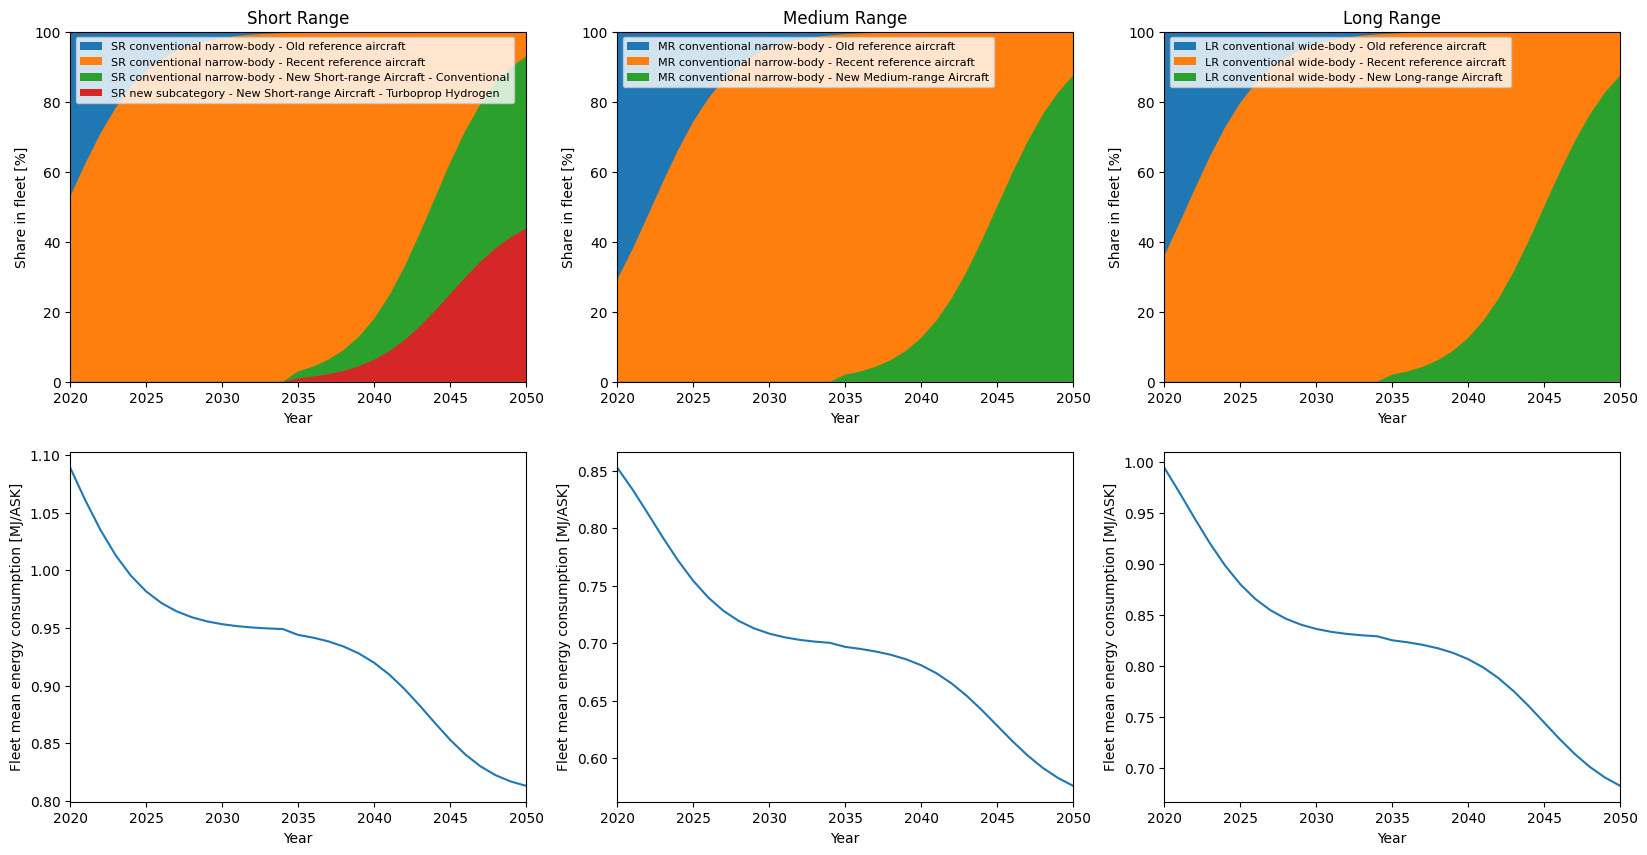

In [3]:
fleet_model.compute()
fleet_model.plot()

#### 2.3. Analyse des résultas

Commentez les résultats obtenus pour le renouvellement de flotte et l'évolution de l'efficacité énergétique. Après un calcul de gain annuel moyenné, vous comparerez notamment aux valeurs historiques obtenues avec l'identité de Kaya.

> **Réponses**

## 3. Amélioration de l'efficacité énergétique via les opérations
<a id="3"></a>

L'objectif de cette partie est de régler les paramètres des modèles (de type sigmoïde) concernant l'amélioration des opérations à horizon 2050. Ces derniers seront utilisés pour réaliser des scénarios prospectifs dans le BE4 avec l'outil AeroMAPS.

On considère que des gains de l'ordre de 6% sont possibles à horizon 2050. En supposant que les gains au niveau opérationnel atteindront environ 2% en 2035 par rapport à 2020, déterminez un paramétrage possible du gain final, de l'année de début de transition et de la durée de transition qui permet de respecter les différentes contraintes. Vérifiez la cohérence des paramétrages réalisés.

In [ ]:
### SAISISSEZ VOS VALEURS ICI (SANS MODIFIER LE NOM DES VARIABLES)

# Choix du gain final (valeur en %)
final_gain = 8
# Choix de la durée de transition (qui permet d'atteindre 98% du gain final)
duration = 15
# Choix de l'année de début de transition (supérieure ou égale à 2020)
first_year = 2025

In [ ]:
year = np.linspace(2020,2050,31)

def evolution_operation(final_gain, first_year, duration):
    transition_year = first_year + duration/2
    limit_operation = 0.02*final_gain
    parameter_operation = np.log(100/2-1)/(duration/2)
    value = np.zeros(len(year))
    for i in range(0,len(year)):
        if final_gain/(1+np.exp(-parameter_operation*(year[i]-transition_year)))<limit_operation:
            value[i] = 0
        else:
            value[i] = final_gain/(1+np.exp(-parameter_operation*(year[i]-transition_year)))
    return value

annual_gain = evolution_operation(final_gain, first_year, duration)

plt.plot(year, annual_gain, color="black")
plt.xlim(2020,2050)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Gains via l'amélioration des opérations [%]")
plt.show()

## 4. Amélioration de l'efficacité énergétique via le taux de remplissage
<a id="4"></a>

L'objectif de cette dernière partie est de simplement estimer le taux de remplissage moyen de la flotte à horizon 2050.

Pour déterminer cette hypothèse, vous pouvez par exemple (au choix) : 
- réaliser une projection tendancielle des données historiques
- trouver des informations et projections industrielles
- trouver les meilleurs taux de remplissage atteints par des compagnies aériennes
- ...

Expliquez votre démarche et indiquez la valeur que vous aurez retenue.

> **Réponses**